In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping   

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#  Import and read the charity_data.csv.
import seaborn as sns
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(2)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [6]:
application_df['SPECIAL_CONSIDERATIONS']=application_df.SPECIAL_CONSIDERATIONS.map({"Y":1,"N":0})

In [7]:
application_df.corr()['IS_SUCCESSFUL']

EIN                      -0.044482
STATUS                   -0.001636
SPECIAL_CONSIDERATIONS    0.005469
ASK_AMT                  -0.010861
IS_SUCCESSFUL             1.000000
Name: IS_SUCCESSFUL, dtype: float64

In [8]:
# Drop the non-beneficial ID columns
application_df.drop(['EIN','SPECIAL_CONSIDERATIONS','STATUS'],axis=1,inplace=True)
application_df.head(2)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1


## NAME column bining

In [9]:
application_name_count=application_df['NAME'].value_counts().to_dict()
application_name_to_replace=[key for (key,value) in application_name_count.items() if value<5 ]
# Replace in dataframe
for app in application_name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

## APPLICATION_TYPE column bining

In [10]:
application_types_count=application_df['APPLICATION_TYPE'].value_counts().to_dict()
application_types_to_replace=[key for (key,value) in application_types_count.items() if value<500 ]
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

## CLASSIFICATION column bining

In [11]:
CLASSIFICATION_value_counts=application_df['CLASSIFICATION'].value_counts().to_dict()
classifications_to_replace=[key for (key,value) in CLASSIFICATION_value_counts.items() if value<1000]
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
dummy_df=pd.get_dummies(application_df)
dummy_df.head(2)

,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X=dummy_df.drop(['IS_SUCCESSFUL'],axis=1).values
y=dummy_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a StandardScaler instances
sc = StandardScaler()

# Fit the StandardScaler
X_scaler = sc.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.shape[1]

443

## STEP1&2: the model is the same as first atempt, the part of data preprocessing was changed

In [27]:
tf.random.set_seed(42)
input_shape=X_train_scaled.shape[1]
nn = tf.keras.models.Sequential()

nn.add(Dense(units=80, input_dim=input_shape, activation='relu'))

nn.add(Dense(30, activation='relu'))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy',metrics=["accuracy"],optimizer='adam')

history=nn.fit(X_train_scaled, y_train,epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 0s 569us/step - loss: 0.4695 - accuracy: 0.7798
Epoch 2/100
858/858 [==============================] - 0s 571us/step - loss: 0.4284 - accuracy: 0.7958
Epoch 3/100
858/858 [==============================] - 0s 562us/step - loss: 0.4239 - accuracy: 0.7982
Epoch 4/100
858/858 [==============================] - 1s 611us/step 

858/858 [==============================] - 1s 609us/step - loss: 0.3994 - accuracy: 0.8098
Epoch 71/100
858/858 [==============================] - 1s 586us/step - loss: 0.3995 - accuracy: 0.8083
Epoch 72/100
858/858 [==============================] - 1s 618us/step - loss: 0.3989 - accuracy: 0.8097
Epoch 73/100
858/858 [==============================] - 1s 599us/step - loss: 0.3992 - accuracy: 0.8095
Epoch 74/100
858/858 [==============================] - 1s 583us/step - loss: 0.3994 - accuracy: 0.8096
Epoch 75/100
858/858 [==============================] - 0s 582us/step - loss: 0.3989 - accuracy: 0.8102
Epoch 76/100
858/858 [==============================] - 1s 599us/step - loss: 0.3987 - accuracy: 0.8092
Epoch 77/100
858/858 [==============================] - 0s 575us/step - loss: 0.3988 - accuracy: 0.8104
Epoch 78/100
858/858 [==============================] - 1s 586us/step - loss: 0.3985 - accuracy: 0.8092
Epoch 79/100
858/858 [==============================] - 0s 580us/step - loss:

In [43]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.4909 - accuracy: 0.7860
Loss: 0.4908713400363922, Accuracy: 0.7860058546066284


<AxesSubplot:>

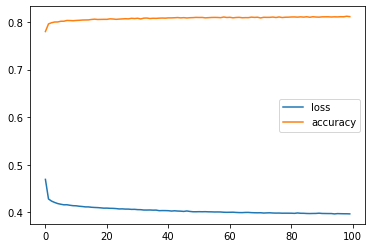

In [29]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

## STEP 3:This time the model was changed too

In [36]:
input_shape=X_train_scaled.shape[1]
nn1 = tf.keras.models.Sequential()

#hidden layer
nn1.add(Dense(units=443, input_dim=input_shape, activation='tanh'))
nn1.add(Dense(35, activation='tanh'))
nn1.add(Dense(3, activation='tanh'))
# Output layer
nn1.add(Dense(1, activation='sigmoid'))

nn1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 443)               196692    
_________________________________________________________________
dense_23 (Dense)             (None, 35)                15540     
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 108       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 4         
Total params: 212,344
Trainable params: 212,344
Non-trainable params: 0
_________________________________________________________________


In [37]:
nn1.compile(loss='binary_crossentropy',metrics=["accuracy"],optimizer='adam')

In [38]:
tf.random.set_seed(42)
mc = tf.keras.callbacks.ModelCheckpoint('model/optim/weights{epoch:01d}.h5',save_weights_only=True, period=5)
 
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)    
history=nn1.fit(X_train_scaled, y_train,epochs=100, callbacks=[early_stop,mc])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 1s 945us/step - loss: 0.4802 - accuracy: 0.7830
Epoch 2/100
858/858 [==============================] - 1s 882us/step - loss: 0.4418 - accuracy: 0.7950
Epoch 3/100
858/858 [==============================] - 1s 878us/step - loss: 0.4333 - accuracy: 0.7977
Epoch 4/100
858/858 [==============================] - 1s 922us/step 

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.4492 - accuracy: 0.7879
Loss: 0.4491606652736664, Accuracy: 0.7879008650779724


<AxesSubplot:>

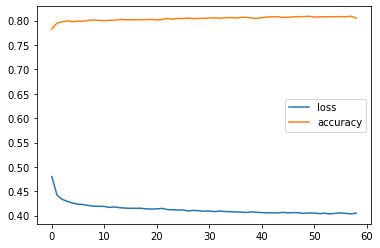

In [40]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

## Saving the model

In [42]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn1.save('model/optim/optimized_model.h5')

## Loading and Choosing the best weight 

In [84]:
input_shape=X_train_scaled.shape[1]
nn2 = tf.keras.models.Sequential()

#hidden layer
nn2.add(Dense(units=443, input_dim=input_shape, activation='tanh'))
nn2.add(Dense(35, activation='tanh'))
nn2.add(Dense(3, activation='tanh'))
# Output layer
nn2.add(Dense(1, activation='sigmoid'))
nn2.compile(loss='binary_crossentropy',metrics=["accuracy"],optimizer='adam')


In [86]:
# Loads the weights
nn2.load_weights('model/optim/weights15.h5')

# Re-evaluate the model
loss, acc = nn2.evaluate(X_test_scaled,y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

215/215 - 0s - loss: 0.4453 - accuracy: 0.7883
Restored model, accuracy: 78.83%
